# PDP assignment 2 - ML Ops pipeline (Toy dataset [#4])
*Adir Ben Ishay*

*667039*

*https://github.com/Adir667/INH-PDP*

---

# Introduction

This assignment covers a simple ML Ops pipeline cycle.

Data:
All data is fictional. The data has been generated so that their distributions are convenient for statistical analysis.

Number: A simple index number for each row

City: The location of a person (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin)

Gender: Gender of a person (Male or Female)

Age: The age of a person (Ranging from 25 to 65 years)

Income: Annual income of a person (Ranging from -674 to 177175)

Illness: Is the person Ill? (Yes or No)

Data source: https://www.kaggle.com/datasets/carlolepelaars/toy-dataset

# Import libraries

In [1]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except ImportError:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

#pandas as pd
try:
    import pandas as pd
    print('Pandas already installed, only imported')
except ImportError:
    !pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')
    
#skleran    
try:
    import sklearn
    print('sklearn already installed, only imported')
except ImportError:
    !pip install sklearn
    print('sklearn was not installed, installed and imported')

#scipy    
try:
    import scipy
    print('scipy already installed, only imported')
except ImportError:
    !pip install scipy
    print('scipy was not installed, installed and imported')
    
#seaboen as sns
try:
    import seaborn as sns
    print('Seaborn already installed, only imported')
except ImportError:
    !pip install seaborn
    import seaborn as sns
    print('Seaborn was not installed, installed and imported')  

NumPy already installed, only imported
PyPlot already installed, only imported
Pandas already installed, only imported
sklearn already installed, only imported
scipy already installed, only imported
Seaborn already installed, only imported


# 1. Data processing

## 1.1 Overview

In [2]:
df = pd.read_csv('data/toy.csv', sep = ',', low_memory=False)

In [3]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## 1.2 Missing values imputation

In [4]:
#looking for nulls
print(df.isnull().sum())

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


There are no nulls or empty values in this dataset.

## 1.3 Outlier removal

A boxplot visualization is used in order to detect the outliers.

### 1.3.1 Age

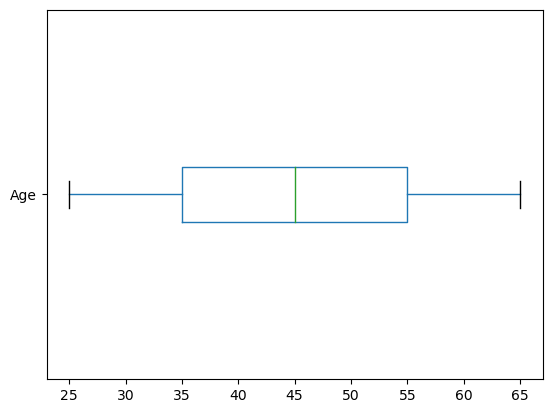

In [5]:
df.boxplot('Age', grid = False, vert = False)
plt.show()

There seems to be no outliers in the age column.

### 1.3.2 Income

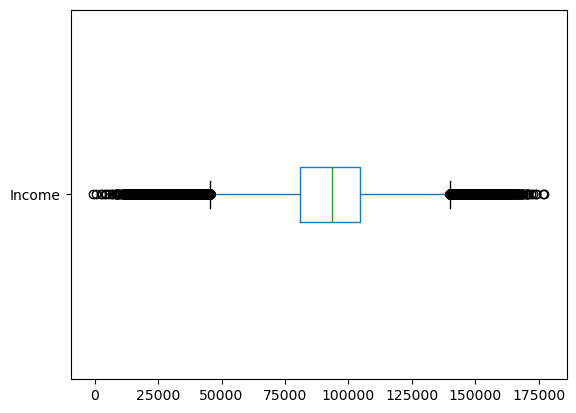

In [6]:
df.boxplot('Income', grid = False, vert = False)
plt.show()

The number of alleged outliers in the income column is so large that it is reasonable to consider these as not outliers, but rather indicative of a wide distribution of income values.

distribution histogram:

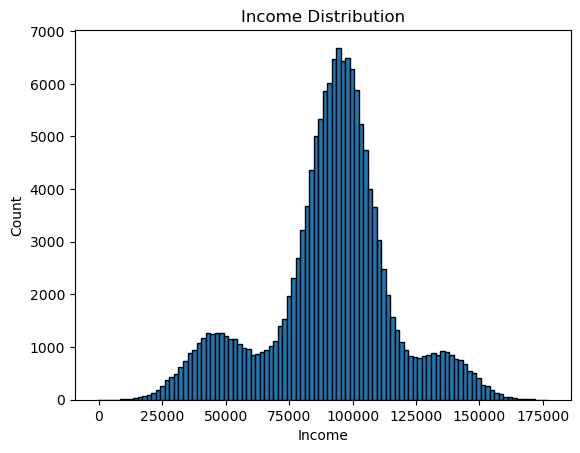

In [7]:
plt.hist(df['Income'], bins=100, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

## 1.4. Data types and categorical features

In [8]:
# check the data types
df.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

To improve memory and computational efficiency and ensure compatibility with algorithms, adjustments should be made to the following values:

    Index Column ("Number"): Since the index column does not impact the prediction of illness, it can be dropped from the dataset to save memory and computational resources.

    Age and Income Values: The age and income values should be converted to the int32 data type for efficient storage and computation. This reduces memory usage compared to larger numeric types like float64 if the data does not require decimal precision.

    Categorical Values: The remaining variables can be converted to categorical values to improve memory efficiency and enable compatibility with certain algorithms. Categorical encoding reduces the memory footprint by representing discrete categories with integers instead of storing them as full strings or objects.

By making these adjustments, you can optimize memory usage, improve computational efficiency, and ensure compatibility with various algorithms and analysis techniques.

In [9]:
# Drop a single column by specifying its name
df = df.drop('Number', axis=1)

#correct types
df['Age'] = df['Age'].astype(int)
df['Income'] = df['Income'].astype(int)
df['City'] = df['City'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Illness'] = df['Illness'].astype('category')

# Print the data types of all columns
print(df.dtypes)

City       category
Gender     category
Age           int32
Income        int32
Illness    category
dtype: object


## 1.5 Scaling

Data scaling is recommended in machine learning and data analysis to ensure comparable magnitudes among features, facilitate faster convergence of optimization algorithms, and prevent biases in distance-based algorithms. It enhances model performance, interpretability, and the ability to extract meaningful insights from the data.

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

#save the unscaled values for later refrences
income_unscaled = df['Income']

# Apply scaling to the 'Income' column
df['Income'] = scaler.fit_transform(df[['Income']])

# 2. Features

In order to find the most predictive features and design new ones, an overview of the distribution for age and income and features correlations are visualized below.

## 2.1. Distribution and correlations

In this part we check the coorelations of the given dataset columns, trying to determine the most predictive features for the model.

### 2.1.1 Income

Correlation coefficient

In [11]:
# Convert 'Illness' column to binary numeric values: No = 0, Yes = 1
df['Illness_numeric'] = (df['Illness'] == 'Yes').astype(int)

# Calculate the correlation coefficient
correlation = df['Income'].corr(df['Illness_numeric'])

print("Correlation coefficient:", correlation)


Correlation coefficient: 0.0002977773741800343


There seem to be no coorelation between income and illness.

### 2.1.2 Age

visualiztion with count plot

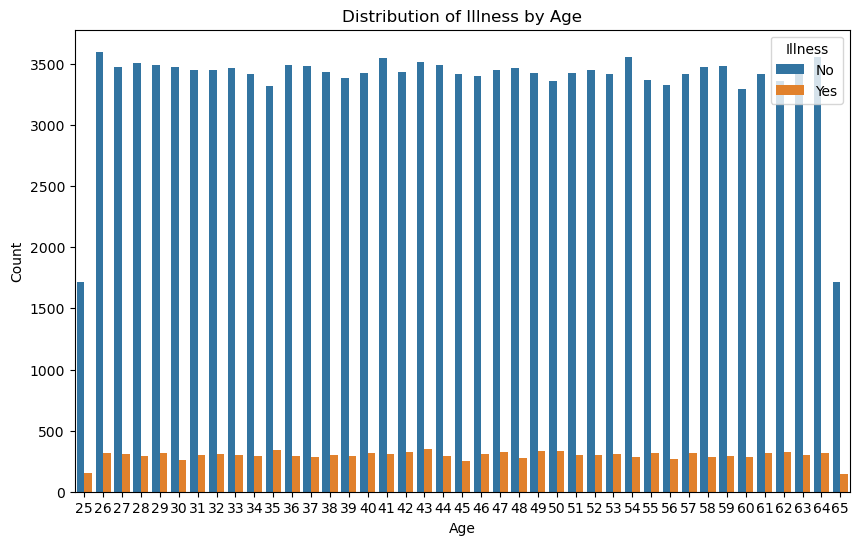

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Illness')
plt.title('Distribution of Illness by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Illness')
plt.show()


Correlation coefficient

In [13]:
# Calculate the correlation coefficient
correlation = df['Age'].corr(df['Illness_numeric'])

print("Correlation coefficient:", correlation)


Correlation coefficient: 0.001811373449451118


There seem to be no coorelation between age and illness as well.

### 2.1.3 City

visualiztion with count plot

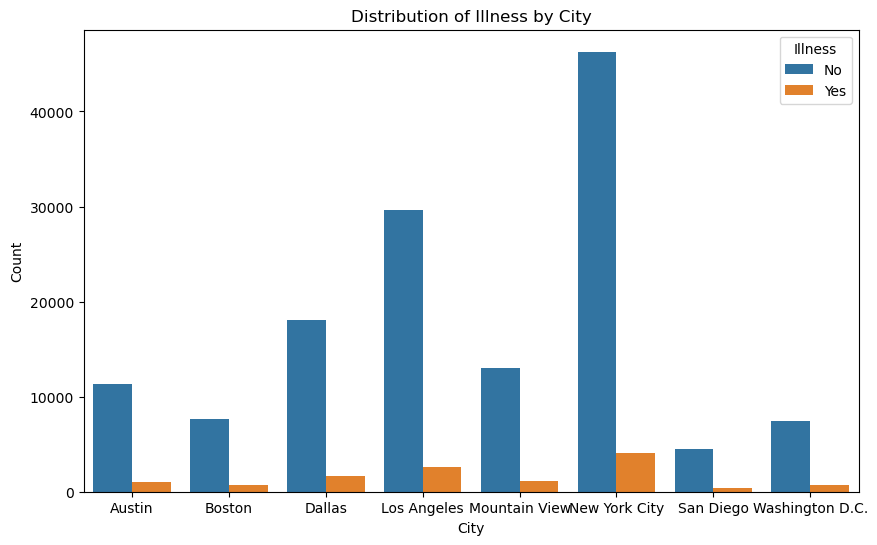

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City', hue='Illness')
plt.title('Distribution of Illness by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Illness')
plt.show()


It is not possible to calculate correlation coefficient with categorical representation (their numeric values dont have calculative meaning). Instead, I chose to show the percentage of illness in each city.

In [15]:
city_counts = df['City'].value_counts()

sick_by_city = df.groupby('City')['Illness_numeric'].mean() * 100
sick_by_city = sick_by_city.rename('Sickness Percentage')

city_info = pd.concat([city_counts, sick_by_city], axis=1)
print(city_info)

                  City  Sickness Percentage
New York City    50307             7.992923
Los Angeles      32173             7.981848
Dallas           19707             8.184909
Mountain View    14219             8.284689
Austin           12292             8.224862
Boston            8301             8.264065
Washington D.C.   8120             8.226601
San Diego         4881             8.072116


The city seems to have no effect on the illness rates, even distribution of 8% per city.

To be more formal accurate, I use Pearson's Chi-square coefficient, also known as Pearson's chi-squared statistic, is a measure of the statistical dependence between two categorical variables. It is used to determine if there is a significant association or relationship between two categorical variables in a contingency table.

In [16]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['Illness'], df['City'])

# Perform the chi-square test and calculate Pearson's chi-square coefficient
chi2, _, _, expected = chi2_contingency(contingency_table)
pearson_chi2 = chi2 / sum(contingency_table.sum())

print("Pearson's Chi-square coefficient:", pearson_chi2)


Pearson's Chi-square coefficient: 1.966509845229909e-05


This number is very close to 0. As expected, no coorelation found for these categories.

### 2.1.4 Gender

visualiztion with count plot

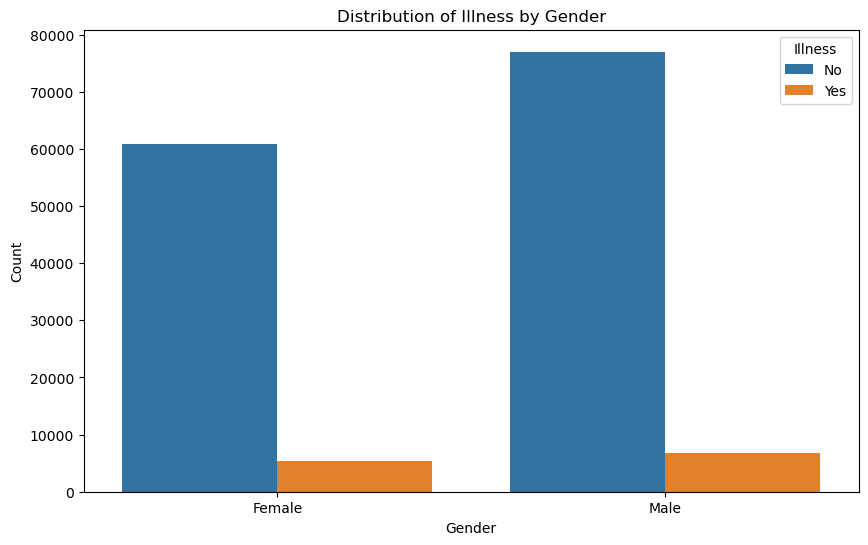

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Illness')
plt.title('Distribution of Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Illness')
plt.show()


In [18]:
gender_counts = df['Gender'].value_counts()
df['Gender_numeric'] = df['Gender'].astype('category').cat.codes
sick_by_gender = df.groupby('Gender')['Illness_numeric'].mean() * 100
sick_by_gender = sick_by_gender.rename('Sickness Percentage')
gender_info = pd.concat([gender_counts, sick_by_gender], axis=1)
print(gender_info)


        Gender  Sickness Percentage
Male     83800             8.124105
Female   66200             8.052870


Again we see the 8% sickness rate, regarless to gender. I begin to think that this fictional dataset has just set randomly 8% of illness regardless to any other parameter.

In [19]:
# Calculate the percentage of people who are sick ('Yes') in the 'Illness' column
percentage_sick = (df['Illness'].value_counts(normalize=True)['Yes']) * 100

print("Percentage of people who are sick:", percentage_sick)


Percentage of people who are sick: 8.092666666666666


**With that conclutions, it is much harder to find coorelations and predictive features of the model (they just dont exist). It seems like the sickness positive values were set randomly across 8% of the data.**

## 2.2 Predicting features

As seen in the previous section, there is no clear cooraltaion between any of the values and illness category.

## 2.3 New features

The two columns that can be divided into new features are "Age" and "Income", these are going to be divided to 3 categories of values.

The new features will probably not have any impact on prediction performance, as there is no correlation whatsoever in the colums that are about to be divided.

In [20]:
# Define the bin edges and labels for age groups
age_bins = [24, 35, 50, 65]
age_labels = ['Young', 'Adult', 'Senior']

# Create the 'Age Group' column using cut()
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Define the bin edges and labels for income levels
income_bins = [-675, 30000, 60000, 177176]
income_labels = ['Low', 'Medium', 'High']

# Create the 'Income Level' column using cut()
df['Income_Level'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

# Display the updated DataFrame
print(df)


          City  Gender  Age    Income Illness  Illness_numeric  \
0       Dallas    Male   41 -2.036294      No                0   
1       Dallas    Male   54 -1.847534      No                0   
2       Dallas    Male   42 -1.551449      No                0   
3       Dallas    Male   40 -2.013324      No                0   
4       Dallas    Male   46 -1.639246      No                0   
...        ...     ...  ...       ...     ...              ...   
149995  Austin    Male   48  0.096689      No                0   
149996  Austin    Male   25  0.219901      No                0   
149997  Austin    Male   26  0.825638      No                0   
149998  Austin    Male   25  0.825357      No                0   
149999  Austin  Female   37 -0.160140      No                0   

        Gender_numeric Age_Group Income_Level  
0                    1     Adult          Low  
1                    1    Senior          Low  
2                    1     Adult          Low  
3              

In [21]:
df.dtypes

City               category
Gender             category
Age                   int32
Income              float64
Illness            category
Illness_numeric       int32
Gender_numeric         int8
Age_Group          category
Income_Level       category
dtype: object

Lets evalutae again the coecoefficient, but now for the new categories created (although no coorelation expected).

Income level:

In [22]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['Illness'], df['Income_Level'])

# Perform the chi-square test and calculate Pearson's chi-square coefficient
chi2, _, _, expected = chi2_contingency(contingency_table)
pearson_chi2 = chi2 / sum(contingency_table.sum())

print("Pearson's Chi-square coefficient:", pearson_chi2)


Pearson's Chi-square coefficient: 0.0


Age group:

In [23]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['Illness'], df['Age_Group'])

# Perform the chi-square test and calculate Pearson's chi-square coefficient
chi2, _, _, expected = chi2_contingency(contingency_table)
pearson_chi2 = chi2 / sum(contingency_table.sum())

print("Pearson's Chi-square coefficient:", pearson_chi2)


Pearson's Chi-square coefficient: 1.1967287242137486e-05


As expected in this scenario, the new features have no impact on the prediction (data is too randomly distributed).

# 3. Model 

For this classification problem, I chose the model "Logistic Regression". Logistic Regression is a popular statistical model used for binary classification tasks. Despite its name, logistic regression is a classification algorithm rather than a regression algorithm. It is widely used in various fields, including machine learning, statistics, and social sciences.

The Logistic Regression model is based on the logistic function (also called the sigmoid function), which maps any real-valued number to a value between 0 and 1. In binary classification, the logistic regression model estimates the probability of an instance belonging to the positive class (e.g., 1) given its input features.

The model assumes a linear relationship between the input features and the log-odds of the positive class. It uses a method called Maximum Likelihood Estimation to learn the optimal coefficients (weights) for each feature. These coefficients are then used to make predictions by calculating the probability of the positive class based on the feature values.

## 3.1 Model by pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into features (X) and target variable (y)
init_df = pd.read_csv('data/toy.csv', sep = ',', low_memory=False)
X = init_df.drop('Illness', axis=1) # all but illness
y = init_df['Illness']

# Define the preprocessing steps for numerical and categorical columns
numeric_features = ['Age', 'Income']
categorical_features = ['City', 'Gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Create the column transformer to apply the appropriate preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline by combining the preprocessing steps with the classification model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9207666666666666


Although no values are missing in this dataset, but if new data contains empty values, they will be replaced by the median for numerical, and by most frequant for categorical. Numerical values are scaled, and categories are converted to one-hot-encoder values.

## 3.2 Model accuracy

In [25]:
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9207666666666666


This number seems to be too accurate and related to the 8% of "random" illness distribution suggested earlier in this document. If no coorelation was found throughout the process, I would not have expected a good accuracy score. Perhaps the confusion matrix can help understand these results.

confusion matrix:

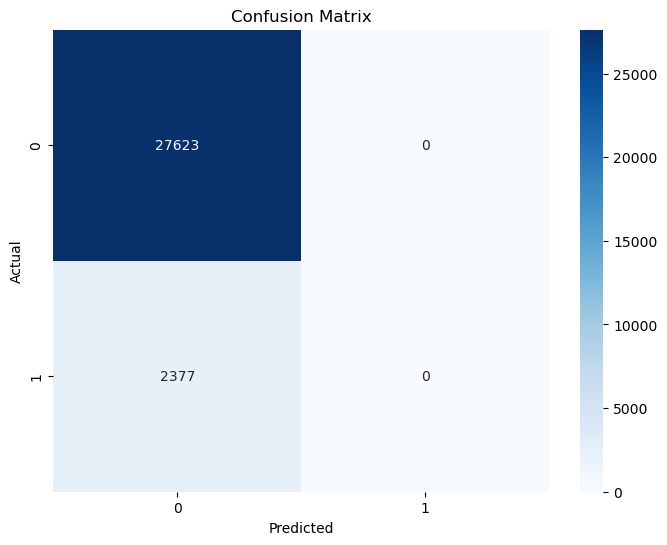

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap plot for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The model is "predicting" and classifying all cases as negative illness (there are no true negatives in the martix). Statisticaly speaking, its high accuracy is achieved simply as a result of the random illness distribution in this dataset. If you always guess negative illness, you will get an accuracy score of 92%.

AUC (Area Under the Curve):

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Convert 'No' and 'Yes' labels to numerical values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Assuming your model does not have predict_proba method
y_pred_scores = pipeline.decision_function(X_test)

# Calculate the False Positive Rate, True Positive Rate, and corresponding thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_scores)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Calculate the AUC
auc = roc_auc_score(y_test_encoded, y_pred_scores)
print("AUC:", auc)


AUC: 0.48908482473259807


The range of the AUC value is between 0 and 1. A perfect classifier has an AUC value of 1, indicating that it can perfectly separate the positive and negative classes. On the other hand, a random classifier that has no discriminative power will have an AUC value of 0.5.

In general, the closer the AUC value is to 1, the better the model's performance in terms of classification. A value above 0.5 suggests that the model is better than random guessing, while a value below 0.5 indicates that the model performs worse than random guessing.

The accuracy scores of the last 3 methods show again that the illness data is spread randomly, and that the model has not better performance than random gussing of illness value.

### 3.2.1 Alternative models

The models below were tested as well in order to see if there is any significant difference in the accuracy of the model:

The following section is commented to allow smoother whole run of the notebook (no better results were achieved with the following models).

Random forest:

In [28]:
# from sklearn.ensemble import RandomForestClassifier

# # Replace the 'classifier' step in the pipeline with Random Forest Classifier
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier())
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)

# # Evaluate the model on the test data
# accuracy = pipeline.score(X_test, y_test)
# print(f"Accuracy: {accuracy}")


SVC (support vector machine):

In [29]:
# from sklearn.svm import SVC

# # Replace the 'classifier' step in the pipeline with Support Vector Classifier
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', SVC())
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)

# # Evaluate the model on the test data
# accuracy = pipeline.score(X_test, y_test)
# print(f"Accuracy: {accuracy}")


## 3.3 Illness prediction

In [30]:
def predict_illness(city, gender, age, income):
    # Create a DataFrame with the input data
    data = pd.DataFrame({
        'City': [city],
        'Gender': [gender],
        'Age': [age],
        'Income': [income],
    })

    # Use the trained pipeline to make predictions
    prediction = pipeline.predict(data)

    # Return the prediction (0 for 'No' and 1 for 'Yes')
    return prediction[0]


In [31]:
predict_illness('Dallas', 'Female', 38, 74000)

'No'

**As seen in the confusion matrix, the answer will always be 'No'**

## 3.4 Pipeline cycle time calculation

In [32]:
import time
# Fit the pipeline to the training data and measure execution time
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

# Calculate the execution time in seconds
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

Execution time: 0.694725513458252 seconds


On my local machine, the pipeline cycle time took ~0.6 seconds:


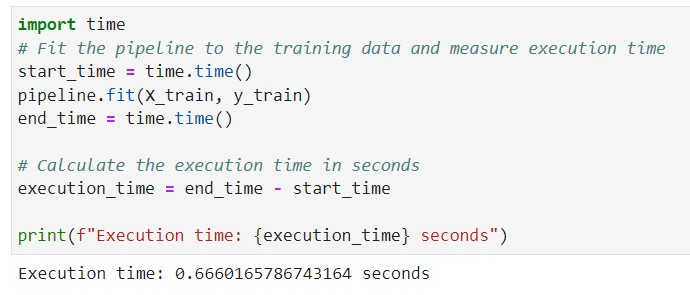

# 4. Discussion

Throughout this document, we have discussed the challenges faced during the prediction process due to the random distribution of data across the dataset. This randomness posed a significant obstacle for the model, as it achieved its best results by simply guessing the most frequent value, which in this case was "not sick". Despite exploring various methods, including visualization tools, no substantial correlations or relationships were discovered among the factors.

Given the limited richness of details in this dataset, the options for creating new features were somewhat constrained. I decided to categorize the age and income columns into three distinct categories based on their values. Alternatively, I considered combining these columns with others, such as age, to create new features like "mid-aged" or together with gender, "mid-aged-women".

The developed pipeline encompasses all the necessary stages of the machine learning process and is characterized by its efficiency in terms of memory consumption and computational power, making it concise and user-friendly.